In [1]:
from tensorflow.keras.models import load_model
from VisionUtils import *
from imgaug import augmenters as iaa
from Manager import *
import tensorflow.keras.backend as k
import tensorflow as tf

import matplotlib.pyplot as plt
import os 
import imgaug
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [2]:
# config = tf.ConfigProto(
#     device_count={'GPU': 1},
#     intra_op_parallelism_threads=1,
#     allow_soft_placement=True
# )        
# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.2

# keras_session = tf.Session(config=config)
# keras.backend.set_session(keras_session)
# m = load_model("Models/FaceNet/model/saved_model.h5")
# def extract_feature( img, bb):


#     try:
#         with self.keras_session.as_default():
#             with keras_session.graph.as_default():
#                 insz = m.input_shape
#                 img = crop_face(img, bb)
#                 img = resize(img,(insz[1],insz[2]))
#                 img = normalize(img).reshape((1, insz[1],insz[2], insz[3]))
#                 image_feature = m.predict(img)
#                 return image_feature
#     except Exception as ex:
#         print('Feature extractor Error', ex, ex.__traceback__.tb_lineno)


In [3]:
m = load_model("Models/FaceNet/model/saved_model.h5")
face_detector =MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
### Important Dirrectories
IMG_RT_PATH = 'data/images/'
FEATURE_RT_PATH = "data/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

In [5]:
import pathlib
data_root = pathlib.Path(IMG_RT_PATH)
print('data_root: ', data_root)

data_root:  data/images


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:
for item_path in data_root.iterdir():
    print('item_path: ', item_path)

item_path:  data/images/n000002
item_path:  data/images/n000003
item_path:  data/images/n000004
item_path:  data/images/n000005
item_path:  data/images/n000006
item_path:  data/images/n000007
item_path:  data/images/n000008
item_path:  data/images/n000010
item_path:  data/images/n000011
item_path:  data/images/n000012
item_path:  data/images/n000013
item_path:  data/images/n000014
item_path:  data/images/n000015
item_path:  data/images/n000016
item_path:  data/images/n000017
item_path:  data/images/n000018
item_path:  data/images/n000019
item_path:  data/images/n000020
item_path:  data/images/n000021
item_path:  data/images/n000022
item_path:  data/images/n000023
item_path:  data/images/n000024
item_path:  data/images/n000025
item_path:  data/images/n000026
item_path:  data/images/n000027
item_path:  data/images/n000028
item_path:  data/images/n000030
item_path:  data/images/n000031
item_path:  data/images/n000032
item_path:  data/images/n000033
item_path:  data/images/n000034
item_pat

item_path:  data/images/n001005
item_path:  data/images/n001006
item_path:  data/images/n001007
item_path:  data/images/n001008
item_path:  data/images/n001009
item_path:  data/images/n001010
item_path:  data/images/n001011
item_path:  data/images/n001012
item_path:  data/images/n001014
item_path:  data/images/n001015
item_path:  data/images/n001016
item_path:  data/images/n001017
item_path:  data/images/n001018
item_path:  data/images/n001019
item_path:  data/images/n001023
item_path:  data/images/n001024
item_path:  data/images/n001025
item_path:  data/images/n001026
item_path:  data/images/n001027
item_path:  data/images/n001028
item_path:  data/images/n001029
item_path:  data/images/n001030
item_path:  data/images/n001031
item_path:  data/images/n001032
item_path:  data/images/n001033
item_path:  data/images/n001034
item_path:  data/images/n001035
item_path:  data/images/n001036
item_path:  data/images/n001037
item_path:  data/images/n001038
item_path:  data/images/n001039
item_pat

item_path:  data/images/n002272
item_path:  data/images/n002273
item_path:  data/images/n002274
item_path:  data/images/n002275
item_path:  data/images/n002276
item_path:  data/images/n002277
item_path:  data/images/n002278
item_path:  data/images/n002279
item_path:  data/images/n002280
item_path:  data/images/n002281
item_path:  data/images/n002283
item_path:  data/images/n002285
item_path:  data/images/n002286
item_path:  data/images/n002287
item_path:  data/images/n002288
item_path:  data/images/n002289
item_path:  data/images/n002290
item_path:  data/images/n002291
item_path:  data/images/n002292
item_path:  data/images/n002293
item_path:  data/images/n002294
item_path:  data/images/n002295
item_path:  data/images/n002296
item_path:  data/images/n002297
item_path:  data/images/n002298
item_path:  data/images/n002299
item_path:  data/images/n002300
item_path:  data/images/n002301
item_path:  data/images/n002302
item_path:  data/images/n002303
item_path:  data/images/n002304
item_pat

item_path:  data/images/n003466
item_path:  data/images/n003467
item_path:  data/images/n003469
item_path:  data/images/n003470
item_path:  data/images/n003471
item_path:  data/images/n003472
item_path:  data/images/n003473
item_path:  data/images/n003474
item_path:  data/images/n003475
item_path:  data/images/n003476
item_path:  data/images/n003477
item_path:  data/images/n003478
item_path:  data/images/n003479
item_path:  data/images/n003481
item_path:  data/images/n003482
item_path:  data/images/n003483
item_path:  data/images/n003484
item_path:  data/images/n003485
item_path:  data/images/n003486
item_path:  data/images/n003487
item_path:  data/images/n003488
item_path:  data/images/n003489
item_path:  data/images/n003491
item_path:  data/images/n003492
item_path:  data/images/n003493
item_path:  data/images/n003494
item_path:  data/images/n003495
item_path:  data/images/n003496
item_path:  data/images/n003497
item_path:  data/images/n003498
item_path:  data/images/n003499
item_pat

item_path:  data/images/n004749
item_path:  data/images/n004750
item_path:  data/images/n004751
item_path:  data/images/n004752
item_path:  data/images/n004753
item_path:  data/images/n004754
item_path:  data/images/n004755
item_path:  data/images/n004757
item_path:  data/images/n004758
item_path:  data/images/n004759
item_path:  data/images/n004760
item_path:  data/images/n004761
item_path:  data/images/n004762
item_path:  data/images/n004763
item_path:  data/images/n004764
item_path:  data/images/n004765
item_path:  data/images/n004766
item_path:  data/images/n004767
item_path:  data/images/n004768
item_path:  data/images/n004769
item_path:  data/images/n004770
item_path:  data/images/n004772
item_path:  data/images/n004773
item_path:  data/images/n004774
item_path:  data/images/n004775
item_path:  data/images/n004776
item_path:  data/images/n004777
item_path:  data/images/n004778
item_path:  data/images/n004779
item_path:  data/images/n004780
item_path:  data/images/n004781
item_pat

item_path:  data/images/n006074
item_path:  data/images/n006075
item_path:  data/images/n006076
item_path:  data/images/n006077
item_path:  data/images/n006078
item_path:  data/images/n006079
item_path:  data/images/n006080
item_path:  data/images/n006081
item_path:  data/images/n006082
item_path:  data/images/n006083
item_path:  data/images/n006084
item_path:  data/images/n006085
item_path:  data/images/n006086
item_path:  data/images/n006087
item_path:  data/images/n006088
item_path:  data/images/n006089
item_path:  data/images/n006090
item_path:  data/images/n006091
item_path:  data/images/n006092
item_path:  data/images/n006093
item_path:  data/images/n006094
item_path:  data/images/n006095
item_path:  data/images/n006096
item_path:  data/images/n006098
item_path:  data/images/n006099
item_path:  data/images/n006100
item_path:  data/images/n006101
item_path:  data/images/n006102
item_path:  data/images/n006103
item_path:  data/images/n006104
item_path:  data/images/n006105
item_pat

item_path:  data/images/n007293
item_path:  data/images/n007294
item_path:  data/images/n007295
item_path:  data/images/n007297
item_path:  data/images/n007298
item_path:  data/images/n007299
item_path:  data/images/n007300
item_path:  data/images/n007301
item_path:  data/images/n007302
item_path:  data/images/n007303
item_path:  data/images/n007304
item_path:  data/images/n007305
item_path:  data/images/n007306
item_path:  data/images/n007307
item_path:  data/images/n007308
item_path:  data/images/n007309
item_path:  data/images/n007310
item_path:  data/images/n007311
item_path:  data/images/n007312
item_path:  data/images/n007313
item_path:  data/images/n007314
item_path:  data/images/n007315
item_path:  data/images/n007316
item_path:  data/images/n007317
item_path:  data/images/n007318
item_path:  data/images/n007319
item_path:  data/images/n007320
item_path:  data/images/n007321
item_path:  data/images/n007322
item_path:  data/images/n007323
item_path:  data/images/n007324
item_pat

item_path:  data/images/n008449
item_path:  data/images/n008450
item_path:  data/images/n008451
item_path:  data/images/n008452
item_path:  data/images/n008453
item_path:  data/images/n008454
item_path:  data/images/n008455
item_path:  data/images/n008456
item_path:  data/images/n008457
item_path:  data/images/n008458
item_path:  data/images/n008459
item_path:  data/images/n008460
item_path:  data/images/n008461
item_path:  data/images/n008462
item_path:  data/images/n008463
item_path:  data/images/n008464
item_path:  data/images/n008465
item_path:  data/images/n008466
item_path:  data/images/n008467
item_path:  data/images/n008468
item_path:  data/images/n008469
item_path:  data/images/n008470
item_path:  data/images/n008471
item_path:  data/images/n008472
item_path:  data/images/n008473
item_path:  data/images/n008474
item_path:  data/images/n008475
item_path:  data/images/n008476
item_path:  data/images/n008477
item_path:  data/images/n008479
item_path:  data/images/n008480
item_pat

In [8]:
import random 
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [ str(path) for path in all_image_paths ]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
image_count

2756340

In [9]:
all_image_paths[:10]

['data/images/n007633/0088_02.jpg',
 'data/images/n005007/0165_01.jpg',
 'data/images/n004718/0026_01.jpg',
 'data/images/n003772/0019_01.jpg',
 'data/images/n005079/0706_02.jpg',
 'data/images/n003726/0383_01.jpg',
 'data/images/n003778/0041_01.jpg',
 'data/images/n008443/0285_02.jpg',
 'data/images/n005989/0365_01.jpg',
 'data/images/n002443/0144_01.jpg']

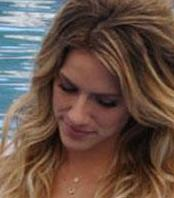

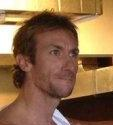

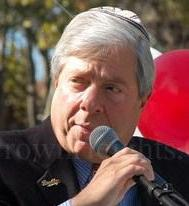

In [10]:
import IPython.display as display

for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print()

In [11]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['n000002',
 'n000003',
 'n000004',
 'n000005',
 'n000006',
 'n000007',
 'n000008',
 'n000010',
 'n000011',
 'n000012',
 'n000013',
 'n000014',
 'n000015',
 'n000016',
 'n000017',
 'n000018',
 'n000019',
 'n000020',
 'n000021',
 'n000022',
 'n000023',
 'n000024',
 'n000025',
 'n000026',
 'n000027',
 'n000028',
 'n000030',
 'n000031',
 'n000032',
 'n000033',
 'n000034',
 'n000035',
 'n000036',
 'n000037',
 'n000038',
 'n000039',
 'n000041',
 'n000042',
 'n000043',
 'n000044',
 'n000045',
 'n000046',
 'n000047',
 'n000048',
 'n000049',
 'n000050',
 'n000051',
 'n000052',
 'n000053',
 'n000054',
 'n000055',
 'n000056',
 'n000057',
 'n000058',
 'n000059',
 'n000060',
 'n000061',
 'n000062',
 'n000063',
 'n000064',
 'n000065',
 'n000066',
 'n000067',
 'n000068',
 'n000069',
 'n000070',
 'n000071',
 'n000072',
 'n000073',
 'n000074',
 'n000075',
 'n000076',
 'n000077',
 'n000079',
 'n000080',
 'n000081',
 'n000083',
 'n000084',
 'n000085',
 'n000086',
 'n000087',
 'n000088',
 'n000089',
 'n0

In [12]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n000002': 0,
 'n000003': 1,
 'n000004': 2,
 'n000005': 3,
 'n000006': 4,
 'n000007': 5,
 'n000008': 6,
 'n000010': 7,
 'n000011': 8,
 'n000012': 9,
 'n000013': 10,
 'n000014': 11,
 'n000015': 12,
 'n000016': 13,
 'n000017': 14,
 'n000018': 15,
 'n000019': 16,
 'n000020': 17,
 'n000021': 18,
 'n000022': 19,
 'n000023': 20,
 'n000024': 21,
 'n000025': 22,
 'n000026': 23,
 'n000027': 24,
 'n000028': 25,
 'n000030': 26,
 'n000031': 27,
 'n000032': 28,
 'n000033': 29,
 'n000034': 30,
 'n000035': 31,
 'n000036': 32,
 'n000037': 33,
 'n000038': 34,
 'n000039': 35,
 'n000041': 36,
 'n000042': 37,
 'n000043': 38,
 'n000044': 39,
 'n000045': 40,
 'n000046': 41,
 'n000047': 42,
 'n000048': 43,
 'n000049': 44,
 'n000050': 45,
 'n000051': 46,
 'n000052': 47,
 'n000053': 48,
 'n000054': 49,
 'n000055': 50,
 'n000056': 51,
 'n000057': 52,
 'n000058': 53,
 'n000059': 54,
 'n000060': 55,
 'n000061': 56,
 'n000062': 57,
 'n000063': 58,
 'n000064': 59,
 'n000065': 60,
 'n000066': 61,
 'n000067': 62,
 '

In [13]:
index_to_label = dict((index,name) for index,name in enumerate(label_names))
index_to_label

{0: 'n000002',
 1: 'n000003',
 2: 'n000004',
 3: 'n000005',
 4: 'n000006',
 5: 'n000007',
 6: 'n000008',
 7: 'n000010',
 8: 'n000011',
 9: 'n000012',
 10: 'n000013',
 11: 'n000014',
 12: 'n000015',
 13: 'n000016',
 14: 'n000017',
 15: 'n000018',
 16: 'n000019',
 17: 'n000020',
 18: 'n000021',
 19: 'n000022',
 20: 'n000023',
 21: 'n000024',
 22: 'n000025',
 23: 'n000026',
 24: 'n000027',
 25: 'n000028',
 26: 'n000030',
 27: 'n000031',
 28: 'n000032',
 29: 'n000033',
 30: 'n000034',
 31: 'n000035',
 32: 'n000036',
 33: 'n000037',
 34: 'n000038',
 35: 'n000039',
 36: 'n000041',
 37: 'n000042',
 38: 'n000043',
 39: 'n000044',
 40: 'n000045',
 41: 'n000046',
 42: 'n000047',
 43: 'n000048',
 44: 'n000049',
 45: 'n000050',
 46: 'n000051',
 47: 'n000052',
 48: 'n000053',
 49: 'n000054',
 50: 'n000055',
 51: 'n000056',
 52: 'n000057',
 53: 'n000058',
 54: 'n000059',
 55: 'n000060',
 56: 'n000061',
 57: 'n000062',
 58: 'n000063',
 59: 'n000064',
 60: 'n000065',
 61: 'n000066',
 62: 'n000067',
 6

In [14]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [7100, 4658, 4398, 3524, 4727, 3480, 3529, 7847, 5536, 2285]


In [15]:
img_path = all_image_paths[0]
img_path

'data/images/n007633/0088_02.jpg'

In [16]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=15592, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x...


In [17]:
def crop_face(img, bb):
    """
    Crop image given bounding box (x,y, width, height)
    """
    x1, y1, width, height = bb
    x1,y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 +height
    return img[y1:y2, x1:x2]

In [18]:
def detect_faces(img, detector):
    results = detector.detect_faces(img)
    bb_lst =[]
    for i in results:
        bb_lst.append(i["box"])
    return bb_lst


In [19]:
input_shape = m.input_shape[1:]

In [20]:
input_shape

(160, 160, 3)

In [21]:
for layer in m.layers[:-6]:
    layer.trainable = False

In [22]:
def squared_differences(pair_of_tensors):
    x, y = pair_of_tensors
    return k.square(x - y)

In [23]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, add

inputs1 = Input(input_shape)
inputs2 = Input(input_shape)
x1 = m(inputs1)
x2 = m(inputs2)
x1 = Model(inputs = inputs1, outputs = x1)
x2 = Model(inputs = inputs2, outputs = x2)


x = Lambda(squared_differences)([x1.output, x2.output])
output = Dense(1, activation = 'sigmoid')(x)

In [24]:
model = Model(inputs =[x1.input,x2.input], outputs=output)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)


In [25]:
def preprocess_image(image):
    
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [600, 600])
    image /= 255.0 

    return image

In [26]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)

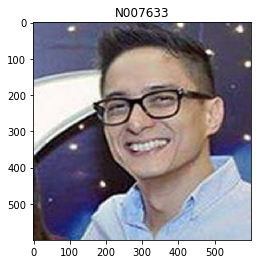

In [27]:
import matplotlib.pyplot as plt


img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.title(label_names[label].title())
print()

In [28]:
img_path

'data/images/n007633/0088_02.jpg'

In [29]:
import os, random
random.choice(os.listdir("data/images/n000476"))

'0003_01.jpg'

In [30]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
type(path_ds)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [31]:
image_datasource1 = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [32]:
image_datasource2 = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

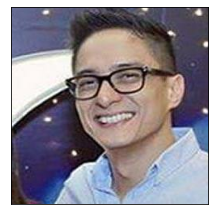

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_datasource1.take(1)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
#   plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

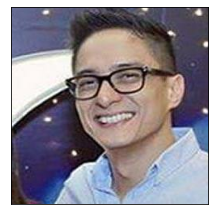

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_datasource2.take(1)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
#   plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [35]:
label_datasource1 = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [36]:
for label in label_datasource1.take(5):
    print(label_names[label.numpy()])

n007633
n005007
n004718
n003772
n005079


In [37]:
image_label_datasource1 = tf.data.Dataset.zip((image_datasource1, label_datasource1))

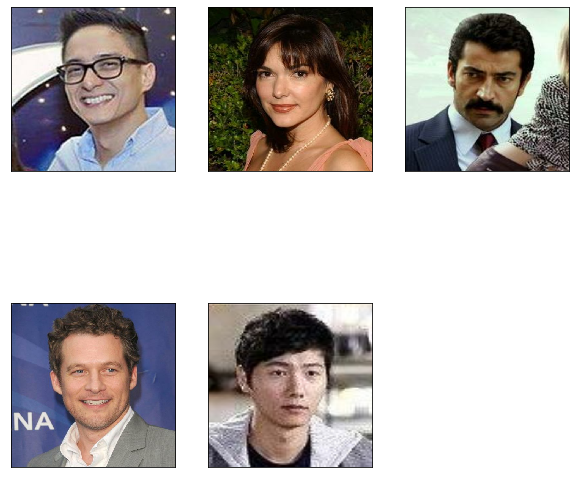

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n1, (imaged, labeld) in enumerate(image_label_datasource1.take(5)):

    plt.subplot(2,3,n1+1)
    plt.imshow(imaged.numpy())
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
#     plt.xlabel(caption_image(all_image_paths[n1]))
plt.show()

In [39]:
BATCH_SIZE = 128

In [40]:
image_label_datasource1 = image_label_datasource1.shuffle(buffer_size=10000)

In [41]:
image_label_datasource1 = image_label_datasource1.repeat()

In [42]:
image_label_datasource1 = image_label_datasource1.batch(BATCH_SIZE)

In [43]:
image_label_datasource1 = image_label_datasource1.prefetch(buffer_size=AUTOTUNE)

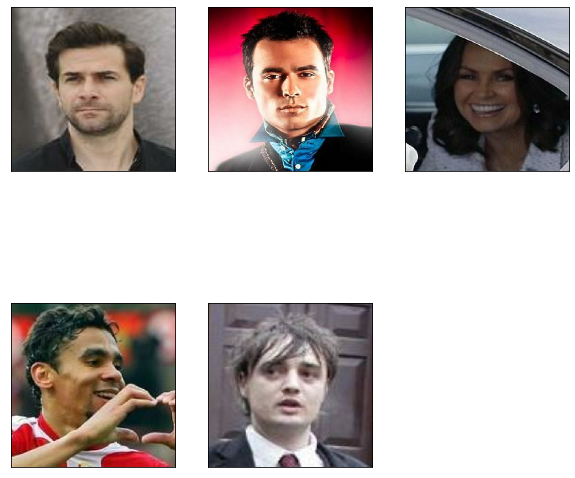

In [44]:
image_batch, label_batch = next(iter(image_label_datasource1))

image_batch_np = image_batch.numpy()
image_batch_np.shape

label_batch_np = label_batch.numpy()
label_batch_np.shape

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n1, (imaged, labeld) in enumerate(zip(image_batch_np[:5], label_batch[:5])):

    plt.subplot(2,3,n1+1)
    plt.imshow(imaged)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
#     plt.xlabel(caption_image(all_image_paths[n1]))
plt.show()

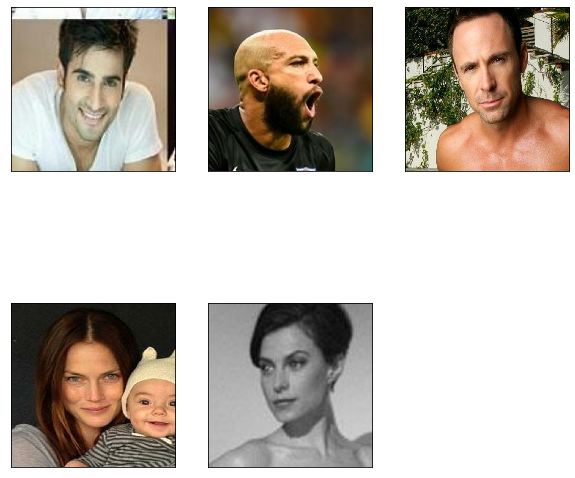

In [45]:
image_batch2, label_batch2 = next(iter(image_label_datasource1))

image_batch2_np = image_batch2.numpy()
image_batch2_np.shape

label_batch2_np = label_batch2.numpy()
label_batch2_np.shape

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for n1, (imaged, labeld) in enumerate(zip(image_batch2_np[:5], label_batch2[:5])):

    plt.subplot(2,3,n1+1)
    plt.imshow(imaged)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
#     plt.xlabel(caption_image(all_image_paths[n1]))
plt.show()

In [46]:
label = all_image_labels[0]
img_path= all_image_paths[0]
dir_path = '/'.join(img_path.split('/')[:-1])
dir_path

'data/images/n007633'

In [47]:
import os, random
img_path1 = dir_path+'/'+random.choice(os.listdir(dir_path))
img_path1

'data/images/n007633/0042_01.jpg'

In [48]:
random.choice(['A', 'B'])

'A'

In [49]:
def load_positive_match(label_index):
    label = index_to_label[label_index]
    dir_path = 'data/images/'+label
    img_path1 = dir_path+'/'+random.choice(os.listdir(dir_path))
    image = load_and_preprocess_image(img_path1)
    return image
    

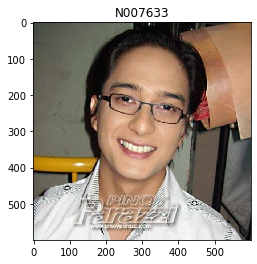

In [50]:
import matplotlib.pyplot as plt


img_path = all_image_paths[0]
label_index = all_image_labels[0]

plt.imshow(load_positive_match(label_index))
plt.grid(False)
plt.title(label_names[label].title())
print()

In [51]:
label_index

7100

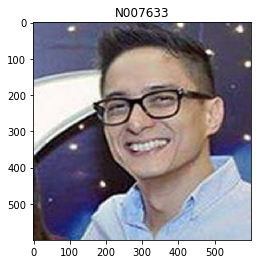

In [52]:
import matplotlib.pyplot as plt



plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.title(label_names[label].title())
print()

In [ ]:
training_images1 = []
training_images2 = []
i = 0
n = 0
batch = 100
for epoch in range(10):
    
    image_batch1, label_batch1 = next(iter(image_label_datasource1))
    image_batch1_np = image_batch1.numpy()
    label_batch1_np = label_batch1.numpy()
    
    image_batch2, label_batch2 = next(iter(image_label_datasource1))
    image_batch2_np = image_batch2.numpy()
    label_batch2_np = label_batch2.numpy()


    for (img1, labeld1, img2, labeld2) in zip(image_batch1_np, label_batch1_np, image_batch2_np, label_batch2_np):
        img_pos = load_positive_match(labeld1)
        (labeld2, img2) = random.choice([(labeld2, img2), (labeld1,img_pos)])
        bb1 = detect_faces(img1, face_detector)
        bb2 = detect_faces(img2, face_detector)
        ### If more than one faces are detected 
        ### ignore 
        if ((len(bb1)!=1) or (len(bb2)!=1)):
            continue
        if (labeld1 == labeld2):
            y.append(1)
        else: 
            y.append(0)
        img1 = crop_face( img1, bb1[0])
        img1 = cv2.resize(img1,(input_shape[0],input_shape[1]))
        img2 = crop_face( img2, bb2[0])
        img2 = cv2.resize(img2,(input_shape[0],input_shape[1]))
        training_images1.append(img1)
        training_images2.append(img2)
        i = i + 1
        if(i==batch):
            ytr = np.array(y)
            xtr1 = np.array(training_images1)
            xtr2 = np.array(training_images2)
            print(n)
            model.fit((xtr1, xtr2), ytr)
            training_images1 = []
            training_images2 = []
            y = []
            i = 0
            n = n +1

#             if (n == total ): break






In [34]:
training_images1 = []
training_images2 = []
i = 0
n = 0
batch = 100
total = len(paths1)//batch
y = []
for path1, path2 in zip(paths1, paths2):
    if (os.path.isfile(IMG_RT_PATH + path1) and os.path.isfile(IMG_RT_PATH + path2)):
        img1 = plt.imread(IMG_RT_PATH + path1)
        img2 = plt.imread(IMG_RT_PATH + path2)
    bb1 = detect_faces(img1, face_detector)
    bb2 = detect_faces(img2, face_detector)
    ### If more than one faces are detected 
    ### ignore 
    if ((len(bb1)!=1) or (len(bb2)!=1)):
        continue
    if (path1[:7] == path2[:7]):
        y.append(1)
    else: 
        y.append(0)
    img1 = crop_face( normalize(img1), bb1[0])
    img1 = cv2.resize(img1,(input_shape[0],input_shape[1]))
    img2 = crop_face( normalize(img2), bb2[0])
    img2 = cv2.resize(img2,(input_shape[0],input_shape[1]))
    training_images1.append(img1)
    training_images2.append(img2)
    #show_img(img1)
    #show_img(img2)
    #print(iman.ytrainp[i])
    #print(path1)
    #print(path2)
    i = i + 1
    if(i==batch):
        ytr = np.array(y)
        xtr1 = np.array(training_images1)
        xtr2 = np.array(training_images2)
        print(n)
        model.fit((xtr1, xtr2), ytr)
        training_images1 = []
        training_images2 = []
        y = []
        i = 0
        n = n +1
        
        if (n == total ): break


0
100/100 [==============================] - 7s 67ms/sample - loss: 0.2987 - acc: 0.8900
1
100/100 [==============================] - 7s 66ms/sample - loss: 0.2392 - acc: 0.9200
2
100/100 [==============================] - 7s 67ms/sample - loss: 0.3586 - acc: 0.8800
3
100/100 [==============================] - 7s 67ms/sample - loss: 0.2825 - acc: 0.8800
4
100/100 [==============================] - 7s 68ms/sample - loss: 0.3019 - acc: 0.8800
5
100/100 [==============================] - 7s 69ms/sample - loss: 0.4258 - acc: 0.7900
6
100/100 [==============================] - 7s 67ms/sample - loss: 0.2754 - acc: 0.9100
7
100/100 [==============================] - 7s 73ms/sample - loss: 0.2731 - acc: 0.9000
8
100/100 [==============================] - 7s 72ms/sample - loss: 0.2590 - acc: 0.9000
9
100/100 [==============================] - 7s 73ms/sample - loss: 0.3834 - acc: 0.8500
10
100/100 [==============================] - 7s 67ms/sample - loss: 0.3267 - acc: 0.8600
11
100/100 [========